In [0]:
import os
import glob
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import get_file 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [0]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = get_file(origin=_URL, 
                    fname='flower_photos.tgz',
                    extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 1s 0us/step


In [0]:
os.listdir(base_dir)

['dandelion', 'daisy', 'sunflowers', 'LICENSE.txt', 'roses', 'tulips']

In [0]:
os.listdir(os.path.join(base_dir, 'tulips'))[:5]

['13903946578_187f904c9a_n.jpg',
 '4591323356_030d8b6967_m.jpg',
 '17167151059_a53bfe0b02.jpg',
 '16055807744_000bc07afc_m.jpg',
 '8555123165_2fe57eff4f.jpg']

In [0]:
# we have to create a train and validation directory
# with train contains 80% of the photos
# and validation contains 20% of the remaining photos

# flower_photos
# |__ diasy
# |__ dandelion
# |__ roses
# |__ sunflowers
# |__ tulips
# |__ train
#     |______ daisy: [1.jpg, 2.jpg, 3.jpg ....]
#     |______ dandelion: [1.jpg, 2.jpg, 3.jpg ....]
#     |______ roses: [1.jpg, 2.jpg, 3.jpg ....]
#     |______ sunflowers: [1.jpg, 2.jpg, 3.jpg ....]
#     |______ tulips: [1.jpg, 2.jpg, 3.jpg ....]
#  |__ val
#     |______ daisy: [507.jpg, 508.jpg, 509.jpg ....]
#     |______ dandelion: [719.jpg, 720.jpg, 721.jpg ....]
#     |______ roses: [514.jpg, 515.jpg, 516.jpg ....]
#     |______ sunflowers: [560.jpg, 561.jpg, 562.jpg .....]
#     |______ tulips: [640.jpg, 641.jpg, 642.jpg ....]

In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [0]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  train_dir = os.path.join(base_dir, 'train', cl)
  for t in train:
    if not os.path.exists(train_dir):
      os.makedirs(train_dir)
    shutil.move(t, train_dir)

  val_dir = os.path.join(base_dir, 'val', cl)
  for v in val:
    if not os.path.exists(val_dir):
      os.makedirs(val_dir)
    shutil.move(v, val_dir)

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
BATCH_SIZE = 100  
IMG_SHAPE  = 150 
EPOCHS = 40

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')

validation_image_generator = ImageDataGenerator(rescale=1./255)  

In [0]:
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           shuffle=True,
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(directory=val_dir,
                                                              batch_size=BATCH_SIZE,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              shuffle=True,
                                                              class_mode='binary')

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [0]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________

In [0]:
history = model.fit_generator(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=EPOCHS,
    verbose=1,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE))))

Epoch 1/40
30/30 [==============================] - 24s 799ms/step - loss: 1.5051 - acc: 0.3271 - val_loss: 1.4986 - val_acc: 0.3429
Epoch 2/40
30/30 [==============================] - 23s 772ms/step - loss: 1.2484 - acc: 0.4586 - val_loss: 1.1317 - val_acc: 0.5252
Epoch 3/40
30/30 [==============================] - 23s 778ms/step - loss: 1.1257 - acc: 0.5434 - val_loss: 1.0639 - val_acc: 0.5442
Epoch 4/40
30/30 [==============================] - 24s 789ms/step - loss: 1.0385 - acc: 0.5802 - val_loss: 0.9740 - val_acc: 0.6190
Epoch 5/40
30/30 [==============================] - 24s 788ms/step - loss: 1.0154 - acc: 0.5905 - val_loss: 0.9017 - val_acc: 0.6476
Epoch 6/40
30/30 [==============================] - 23s 782ms/step - loss: 0.9356 - acc: 0.6198 - val_loss: 0.9258 - val_acc: 0.6231
Epoch 7/40
30/30 [==============================] - 23s 777ms/step - loss: 0.9270 - acc: 0.6327 - val_loss: 0.9198 - val_acc: 0.6408
Epoch 8/40
30/30 [==============================] - 24s 784ms/step - 

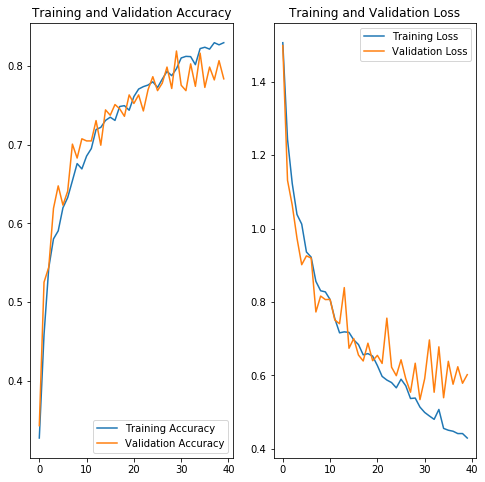

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()